In [ ]:
#Authors:Group 9
    #Beiyang Yu (5353653)
    #Mazen Alqadi (476578)
    #Tianyang Lu (5215277)
    #Xilin Yin (5271649)

In [933]:
import numpy as np
import math
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy.integrate as spint
%matplotlib inline

In [934]:
doc1 = pd.read_csv('WieringermeerData_Meteo.csv')   # Read the measured data                        

In [936]:
Jrf = np.zeros(2757, dtype=float)      
E = np.zeros(2757, dtype=float)
Jrf[0:2757] = doc1.iloc[3451:6208,1]   
E[0:2757] = doc1.iloc[3451:6208,2]
# Initialization of J and E matrix

array([0.    , 0.    , 0.0075, ..., 0.    , 0.    , 0.    ])

In [937]:
acl = 0.007     # 0.005~0.01
awb = 0.0008    # 0.0005~0.001
Scl_max = 0.60  # 0.45~0.975
Swb_max = 7.0   # 4.5~7.8
Scl_min = 0     
Swb_min = 0
beta0 = 0.98    # 0~1
Cf = 0.92       # 0~1.4
fred = 1.0
bcl = 5         # 0~80
bwb = 30        # 0~80
def dYdt(t, Y):
    a = math.ceil(t)
    return np.array([Jrf[a-1] - acl * ((Y[0] - Scl_min) / (Scl_max - Scl_min)) ** bcl -  E[a-1] * Cf * fred,
                    (1 - beta0 * (Y[0] - Scl_min) / (Scl_max - Scl_min)) * acl * ((Y[0] - Scl_min) / (Scl_max - Scl_min)) ** bcl - awb * ((Y[1] - Swb_min) / (Swb_max - Swb_min)) ** bwb])
# Definition of the ODE 

In [938]:
# Initialisation of tOut and t_span
tOut = np.linspace(0, 2757, 2757)    # 6209 points are measured but only 2757 are used
nOut = np.shape(tOut)[0]
t_span = [tOut[0], tOut[-1]]  

In [939]:
# Set up the initial value
Y0 = np.array([Scl_max / 1.547, Swb_max / 1.035])
# Solve ODE
res = spint.solve_ivp(dYdt, t_span, Y0, t_eval=tOut, vectorized=True,
                      method='RK45', rtol=1e-5)

C:\Users\Yu Beiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 66488
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00036284e+00, 2.00072569e+00, ...,
       2.75499927e+03, 2.75599964e+03, 2.75700000e+03])
 t_events: None
        y: array([[0.38784745, 0.3845959 , 0.38137275, ..., 0.46189024, 0.45981142,
        0.45762167],
       [6.76328502, 6.76328566, 6.76327763, ..., 6.69445016, 6.69470317,
        6.69495171]])

In [940]:
t = res['t']
Y = res['y']
# The solution for ODE

6.76328502415459

Text(0, 0.5, 'Waste body storage (m)')

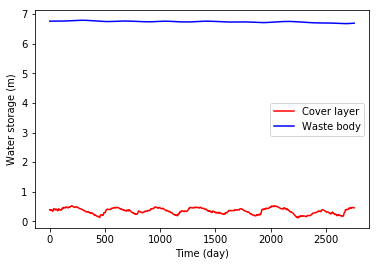

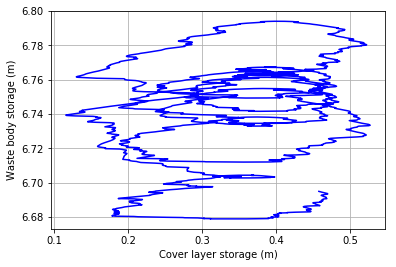

In [945]:
rODE = Y[0,:]
fODE = Y[1,:]
tOut1 = np.linspace(0, 2757, 2757)

# Plot Cover layer storage and Waste body storage over time
plt.figure()
plt.plot(tOut1, rODE, 'r-', label='Cover layer')
plt.plot(tOut1, fODE  , 'b-', label='Waste body')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time (day)')
plt.ylabel('Water storage (m)')
# f1.savefig('Cover_layer_and_Waste_body.png')

# Plot Cover layer storage VS Waste body storage 
plt.figure()
plt.plot(rODE,fODE , 'b-', label='ODE')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Cover layer storage (m)')
plt.ylabel('Waste body storage (m)')

In [942]:
doc2 = pd.read_csv('WieringermeerData_LeachateProduction.csv')   # Read the measured data 
Q_dr = doc2.iloc[:,1]


In [943]:
tOut = np.linspace(0, 2757, 2757)
nOut = np.shape(tOut)[0]
Q_cal = np.zeros(2757)
Q_rate = np.zeros(2757)
E = np.zeros(2757)
Q_rate[0] =  0.
# Calculate the storage rate from the measured data
for i in range (1, nOut-1):
    Q_rate[i] = Q_dr[i] - Q_dr[i-1]
Q_cal = beta0 * ((rODE - Scl_min) / (Scl_max - Scl_min)) * acl * ((rODE - Scl_min) / (Scl_max - Scl_min)) ** bcl + awb * ((fODE - Swb_min) / (Swb_max - Swb_min)) ** bwb
Q_cal = Q_cal * 28355   # Multiply the area
print(Q_cal)

[22.27278304 21.57377408 20.90911925 ... 46.42959831 45.35535015
 44.24942478]


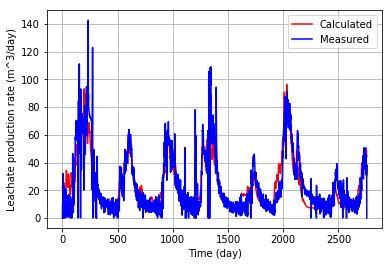

In [944]:
plt.figure()
plt.plot(tOut, Q_cal, 'r-', label='Calculated')
plt.plot(tOut, Q_rate, 'b-', label='Measured')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time (day)')
plt.ylabel('Leachate production rate (m^3/day)')
plt.show()
# Plot the calculated and measured leachate production rate over time

In [920]:
Qcal = np.zeros(2757)
Qcal[0] = Q_cal[0]
for i in range(1,2757):
    Qcal[i] = Qcal[i-1] + Q_cal[i] 
    
print(Qcal)

#aList = []
aList.append( Qcal );
# Save the calculated Qcal for variable parameters

[4.35119741e+00 8.69761385e+00 1.30392663e+01 ... 6.26192906e+04
 6.26566360e+04 6.26908886e+04]


[array([2.26840008e+01, 4.53680016e+01, 6.80520022e+01, ...,
        1.69227974e+05, 1.69288251e+05, 1.69344880e+05]),
 array([1.21111739e+01, 2.42100583e+01, 3.62966775e+01, ...,
        1.25625375e+05, 1.25668276e+05, 1.25707333e+05]),
 array([6.46625514e+00, 1.29255044e+01, 1.93777628e+01, ...,
        1.17350011e+05, 1.17389693e+05, 1.17425833e+05]),
 array([3.45238687e+00, 6.90177744e+00, 1.03481769e+01, ...,
        1.16222493e+05, 1.16263463e+05, 1.16300578e+05]),
 array([1.84325796e+00, 3.68537676e+00, 5.52635779e+00, ...,
        1.12279373e+05, 1.12320037e+05, 1.12356849e+05]),
 array([9.84130881e-01, 1.96785570e+00, 2.95117481e+00, ...,
        1.12738466e+05, 1.12777415e+05, 1.12812808e+05]),
 array([4.35119741e+00, 8.69761385e+00, 1.30392663e+01, ...,
        6.26192906e+04, 6.26566360e+04, 6.26908886e+04])]

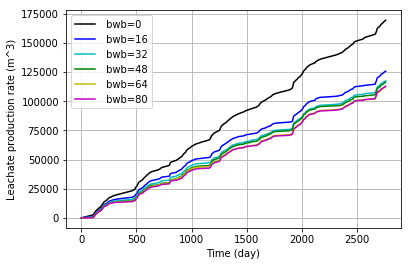

In [887]:
plt.figure()
plt.plot(tOut, aList[0], 'k-', label=' bwb=0')
plt.plot(tOut, aList[1], 'b-', label=' bwb=16')
plt.plot(tOut, aList[2], 'c-', label=' bwb=32')
plt.plot(tOut, aList[3], 'g-', label=' bwb=48')
plt.plot(tOut, aList[4], 'y-', label=' bwb=64')
plt.plot(tOut, aList[5], 'm-', label=' bwb=80')
#plt.plot(tOut, Q_dr, 'r-', label='Measured')

#plt.xlim(1400, 2000)
#plt.ylim(60000, 90000)
# Zoom in the graph

plt.grid()
plt.legend(loc='best')
plt.xlabel('Time (day)')
plt.ylabel('Leachate production (m^3)')
plt.savefig("filename.png")
plt.show()

# Plot the results of variable parameters over time